## 20대
20대는 어디에 많이 있을까요. 인구가 많은 곳에 많지만, 우리는 다른 연령대에 비해 20대가 특히 많은 곳이 궁금합니다. 이걸 비율로 환산해서 폴리곤에 색칠을 할 수도 있겠지만 이러면 실제로 20대는 적은데 비율만 높은 곳이 과장되어 그려지게 됩니다. 그래서 우린 점으로 표현하려 한 것입니다.

우선 사전 준비 작업을 합시다.

In [2]:
import numpy as np
from IPython.core.display import display, HTML

import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
from datashader.utils import lnglat_to_meters as webm
from datashader.colors import colormap_select as cm
from colorcet import fire
from datashader.colors import viridis

display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
# 주어진 좌표 주변을 출력하는 canvas를 만드는 함수. 나중에 이미지 출력할 때 쓸거에요.
def get_cvs(lon, lat, w, h, plot_size, min_alpha=120):
    x, y = webm(lon, lat)
    x_range = (x-w, x+w)
    y_range = (y-h, y+h)
    cvs = ds.Canvas(plot_width=plot_size,plot_height=int(plot_size * h/w), x_range=x_range, y_range=y_range)
    return cvs

In [3]:
# 데이터 불러오기
df = pd.read_hdf('../processed-data/korea-census-2017.h5', 'dot_age')

20대를 표시하는 컬럼 하나를 덧붙입시다.

In [34]:
df['is20'] = np.where(df['value'].isin([5, 6]), 1, 0)
df.is20 = df.is20.astype('category')

In [35]:
seoul_metro = (126.93, 37.5, 40000, 40000)
cvs = get_cvs(*seoul_metro, 1000)
agg = cvs.points(df, 'easting', 'northing', ds.count_cat('is20'))

이제 서울 주변 20대 인구만 한번 출력해보겠습니다. 20대는 value field의 값이 [5, 6]인 경우입니다. 

In [38]:
agg20 = agg.sel(is20=1)

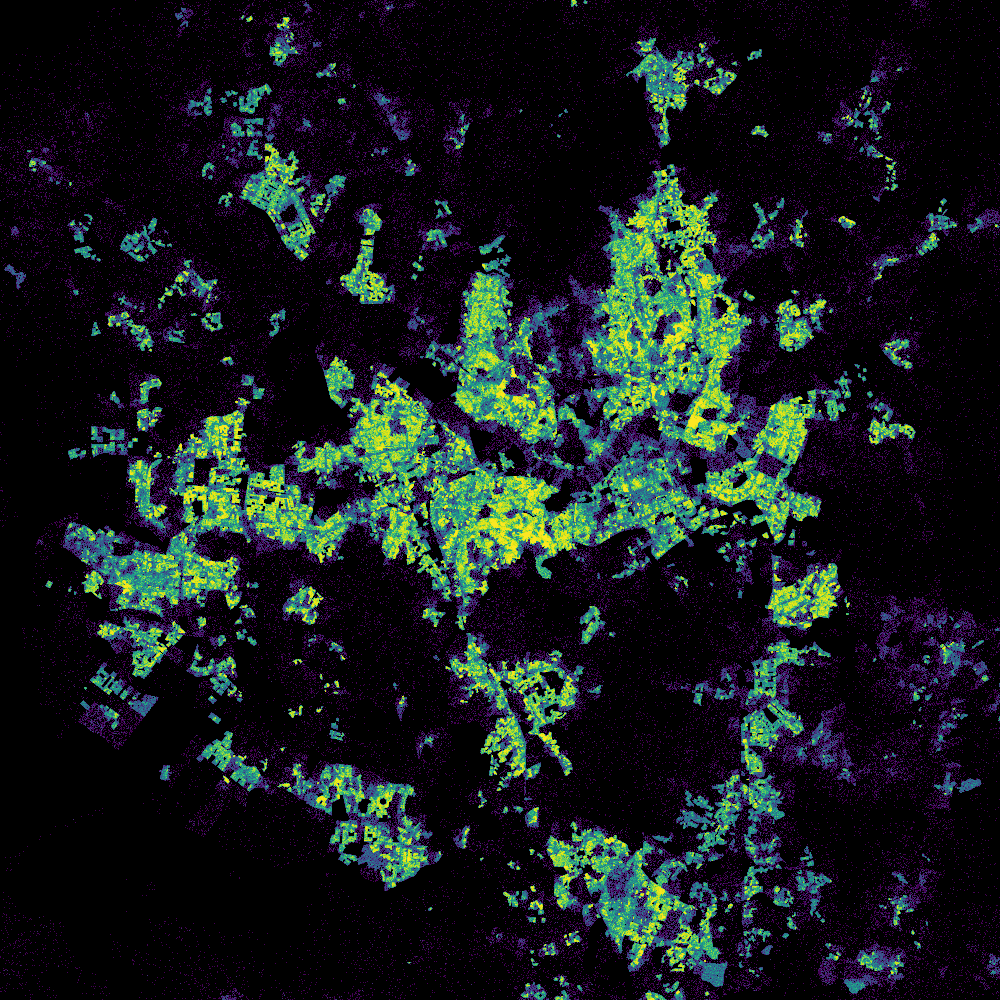

In [39]:
tf.set_background(tf.shade(agg20, cmap=cm(viridis)), "black")

이렇게 표시하니 수도권 지역의 20대 분포가 한눈에 들어옵니다. 그런데, 어느 지역이 20대가 많다고 했을 때, 그 지역에 20대가 다른 연령대와 비교해서도 유난히 많은 것인지, 아니면 단지 그 지역의 인구가 많은 것인지 알 수가 없습니다. 그러니 비20대 인구도 같이 표시하면 좋겠습니다.

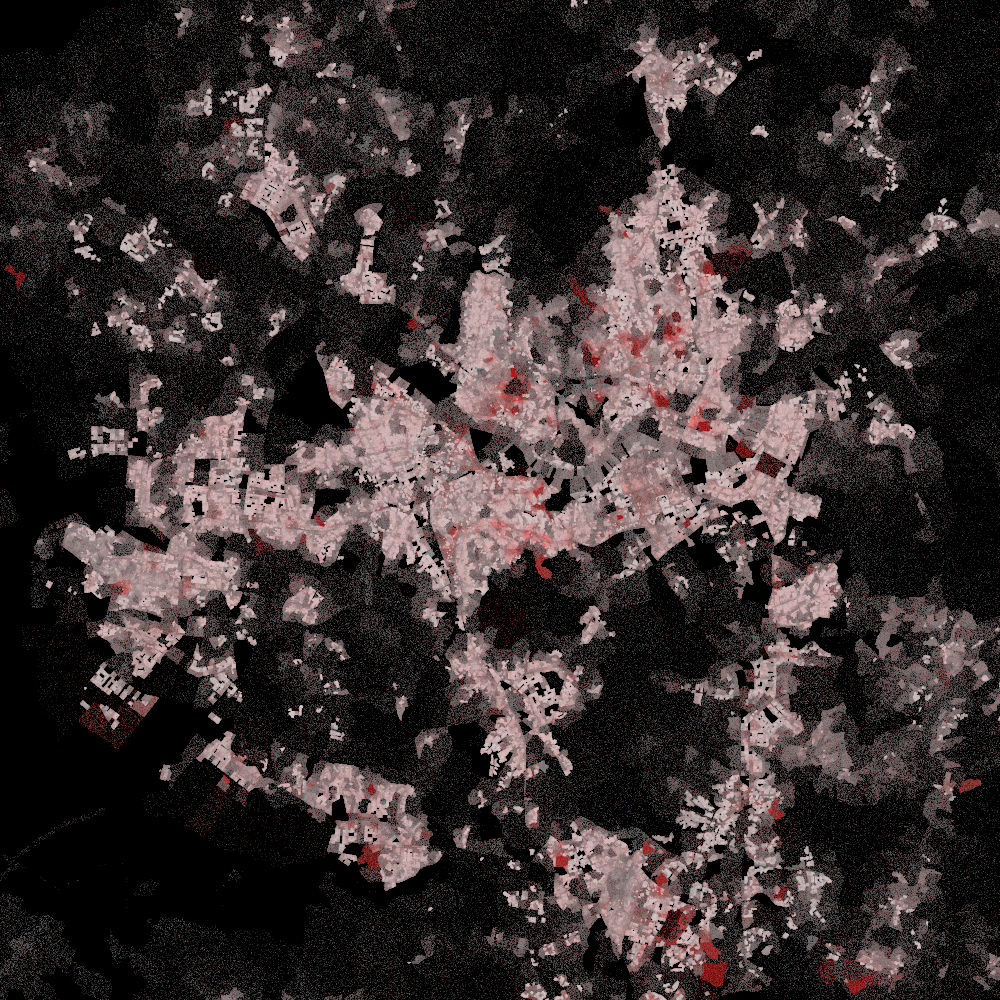

In [56]:
tf.set_background(tf.shade(agg, color_key={1:'red', 0:'lightgray'}), "black")